In [1]:
import sys  
sys.path.append(r'../source')  
import utils
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Origen de los datos

# Análisis exploratorio sin entrar en el contenido

In [2]:
data_raw_0 = utils.electronics_5_to_raw_data_0(100000)

00h 00m 00s ____ INICIO FUNCIÓN ELECTRONICS_5_TO_RAW_DATA_0 ________________________________________
00h 00m 00s ____ INICIO FUNCIÓN GETDF ______________________________________________________________
00h 00m 00s :::: BUCLE RAW DATA: i=50000 de 100000 :::::::::::::::::::::::::::::::::::::::::::::::::
00h 00m 01s :::: BUCLE RAW DATA: i=100000 de 100000 ::::::::::::::::::::::::::::::::::::::::::::::::
00h 00m 00s ____ FIN FUNCIÓN GETDF _________________________________________________________________
00h 00m 04s :::: SE PROCEDE A CREAR EL CAMPO OPINION_YEAR ::::::::::::::::::::::::::::::::::::::::::
00h 00m 06s :::: SE PROCEDE A ELIMINAR COLUMNAS QUE NO USAREMOS ::::::::::::::::::::::::::::::::::::
00h 00m 00s :::: SE PROCEDE A RENOMBRAR ALGUNAS COLUMNAS :::::::::::::::::::::::::::::::::::::::::::
00h 00m 00s :::: SE PROCEDE A SUSTITUIR LOS NANS POR CADENAS VACÍAS ::::::::::::::::::::::::::::::::
00h 00m 00s ____ FIN FUNCIÓN ELECTRONICS_5_TO_RAW_DATA_0 __________________________________

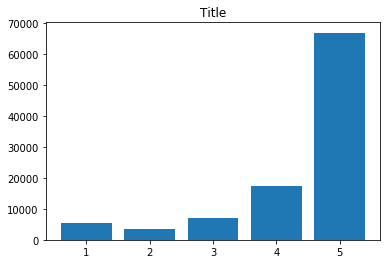

In [3]:
utils.perform_eda(data_raw_0, 'rating_distribution')

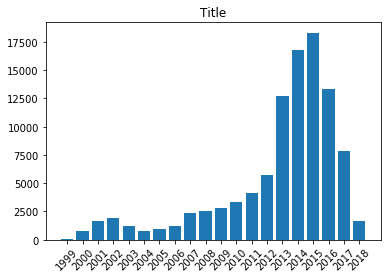

In [4]:
utils.perform_eda(data_raw_0, 'opinions_per_year')

Aparecen 1937 productos distintos en el dataset.


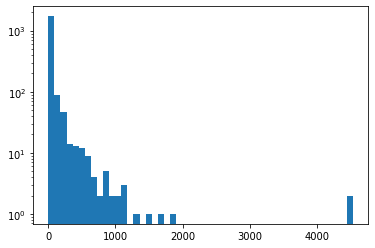

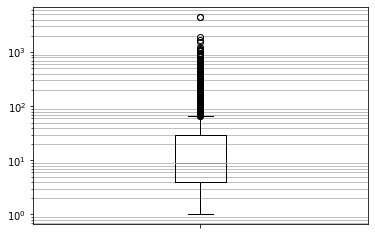

In [5]:
utils.perform_eda(data_raw_0, 'opinions_per_item')

Aparecen 76766 usuarios distintos en el dataset.


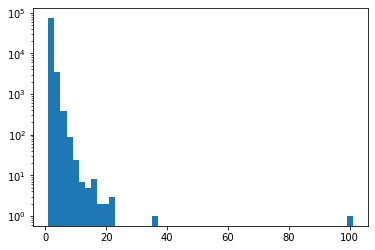

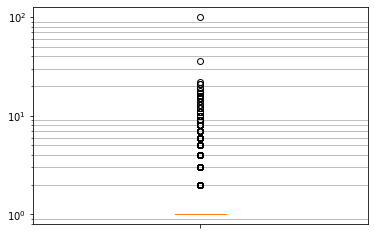

In [6]:
utils.perform_eda(data_raw_0, 'opinions_per_user')

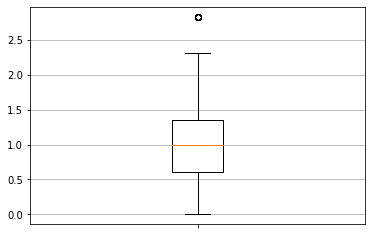

In [7]:
utils.perform_eda(data_raw_0, 'rating_sd_per_item')

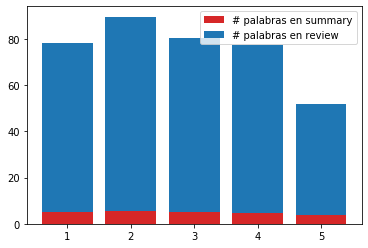

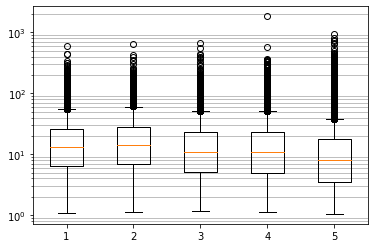

In [8]:
utils.perform_eda(data_raw_0, 'summary_review_length_comparison_per_rating')

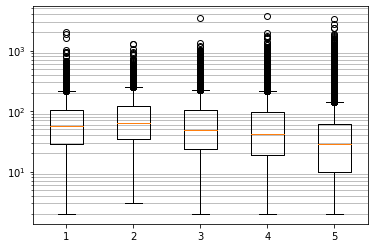

In [9]:
utils.perform_eda(data_raw_0, 'text_length_per_rating')

In [10]:
data_raw_1 = utils.remove_rating_bias_from_raw_data(data_raw_0)

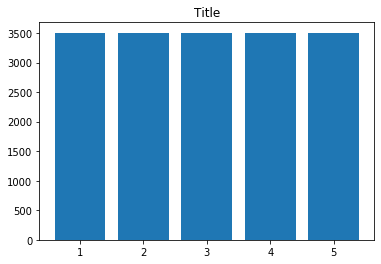

In [11]:
utils.perform_eda(data_raw_1, 'rating_distribution')

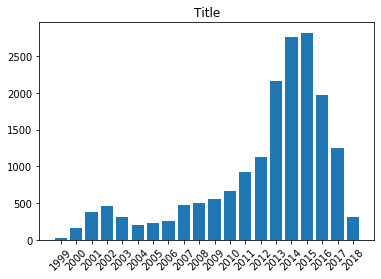

In [12]:
utils.perform_eda(data_raw_1, 'opinions_per_year')

Aparecen 1478 productos distintos en el dataset.


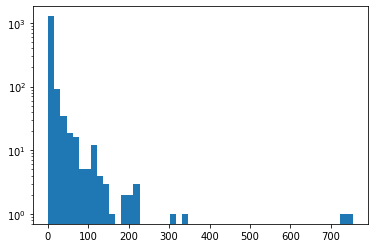

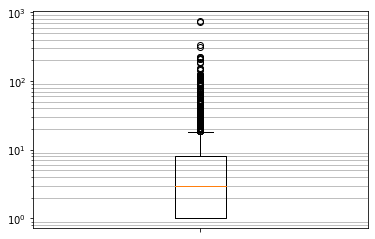

In [13]:
utils.perform_eda(data_raw_1, 'opinions_per_item')

Aparecen 16119 usuarios distintos en el dataset.


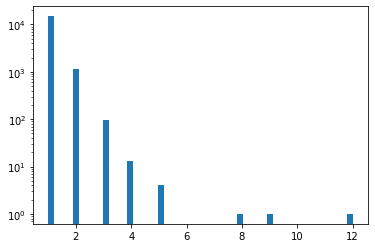

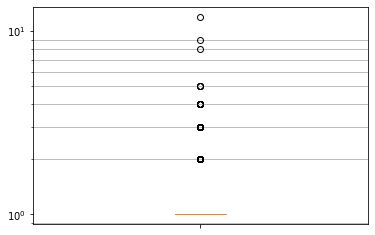

In [14]:
utils.perform_eda(data_raw_1, 'opinions_per_user')

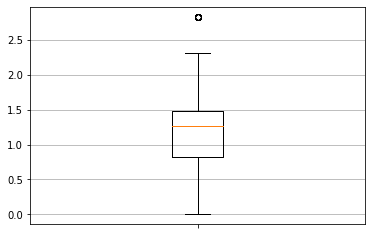

In [15]:
utils.perform_eda(data_raw_1, 'rating_sd_per_item')

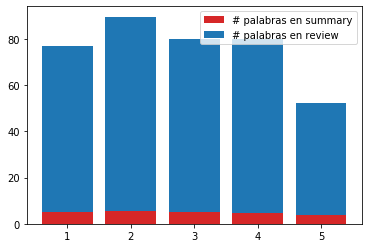

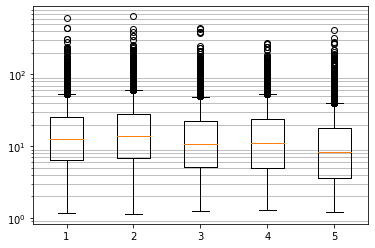

In [16]:
utils.perform_eda(data_raw_1, 'summary_review_length_comparison_per_rating')

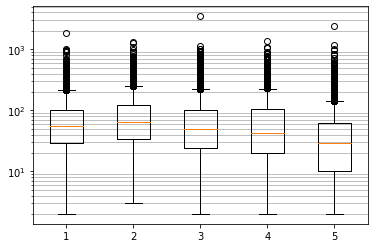

In [17]:
utils.perform_eda(data_raw_1, 'text_length_per_rating')

# Preparación de los datos

In [18]:
odf = utils.execute_preprocessing_pipeline(data_raw_1, False)

00h 00m 00s ____ INICIO FUNCIÓN EXECUTE_PREPROCESSING_PIPELINE _____________________________________
00h 00m 02s :::: SUMMARIES PROCESADOS ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
00h 00m 26s :::: REVIEWS PROCESADAS ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
00h 00m 00s ____ INICIO FUNCIÓN BUILD_ODF __________________________________________________________
00h 00m 00s :::: BUCLE GENERACIÓN VARIABLE TEXT: i=0 DE 17525 ::::::::::::::::::::::::::::::::::::::
00h 00m 00s :::: BUCLE GENERACIÓN VARIABLE TEXT: i=10000 DE 17525 ::::::::::::::::::::::::::::::::::
00h 00m 00s :::: VARIABLE TEXT GENERADA ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
00h 00m 00s :::: VARIABLE TEXT TRANSFORMADA ::::::::::::::::::::::::::::::::::::::::::::::::::::::::
00h 00m 00s ____ FIN FUNCIÓN BUILD_ODF _____________________________________________________________
00h 00m 00s :::: ODF_FALSE CONSTRUIDO :::::::::::::::::::::::::::::::::::::::::::::::::::::

# Herramientas y objetos a emplear

In [19]:
tokens = utils.generate_bow(odf, False, show=False)
bigrams = utils.extract_bigrams_from_bow(tokens)

00h 00m 00s ____ INICIO FUNCIÓN GENERATE_BOW _______________________________________________________
00h 00m 02s :::: LISTA DE BIGRAMS FINALIZADA :::::::::::::::::::::::::::::::::::::::::::::::::::::::
00h 00m 00s ____ FIN FUNCIÓN GENERATE_BOW __________________________________________________________


# Temas y Wordsets

# Análisis

00h 00m 00s ____ INICIO FUNCIÓN ANALIZE_WORDSET_NOT_SO_NAIVE _______________________________________
00h 00m 00s :::: WORDSET A ANALIZAR: buen funcionamiento del producto ::::::::::::::::::::::::::::::
00h 00m 00s :::: ARRANCA EL BUCLE DE OPINIONES :::::::::::::::::::::::::::::::::::::::::::::::::::::
00h 00m 00s :::: BUCLE OPINIONES: NUM_DOCUMENTO=0 DE 17525 :::::::::::::::::::::::::::::::::::::::::
00h 00m 02s :::: FINALIZA EL BUCLE DE OPINIONES ::::::::::::::::::::::::::::::::::::::::::::::::::::


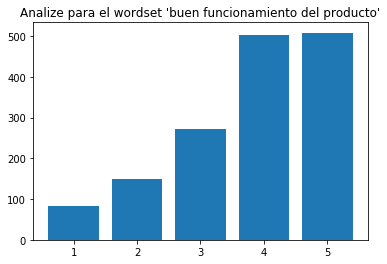

00h 00m 00s ____ FIN FUNCIÓN ANALIZE_WORDSET_NOT_SO_NAIVE __________________________________________


In [20]:
wsw1 =   {
            'name':'buen funcionamiento del producto'
            ,'wordset': 
            {
                'ands': [],
                'ors' :
                    [
                    # MUY POSITIVO
                    {
                    'syn0': ['works_great', 'works_flawlessly', 'works_perfectly', 'worked_perfectly', 'works_well'],
                    'syn1': [],
                    'syn2': [],
                    'nots': ['not']
                    }
                    # POSITIVO
                    ,{
                    'syn0': ['works_fine', 'good_job', 'working_properly', 'works_ok', 'work_properly', 'serves_purpose'],
                    'syn1': [],
                    'syn2': [],
                    'nots': ['not']
                    }
                    ,{
                    'syn0': [],
                    'syn1': ['works'],
                    'syn2': ['expected'],
                    'nots': ['not']
                    }
                    # BAJO CONSUMO
                    ,{
                    'syn0': [],
                    'syn1': ['power_consumption'],
                    'syn2': ['low'],
                    'nots': []
                    }
                    ]
            }
        }
an1_fil, an1_agg = utils.analize_wordset_not_so_naive_4(odf, wsw1, True)

00h 00m 00s ____ INICIO FUNCIÓN ANALIZE_WORDSET_NOT_SO_NAIVE _______________________________________
00h 00m 00s :::: WORDSET A ANALIZAR: mal funcionamiento del producto :::::::::::::::::::::::::::::::
00h 00m 00s :::: ARRANCA EL BUCLE DE OPINIONES :::::::::::::::::::::::::::::::::::::::::::::::::::::
00h 00m 00s :::: BUCLE OPINIONES: NUM_DOCUMENTO=0 DE 17525 :::::::::::::::::::::::::::::::::::::::::
00h 00m 02s :::: FINALIZA EL BUCLE DE OPINIONES ::::::::::::::::::::::::::::::::::::::::::::::::::::


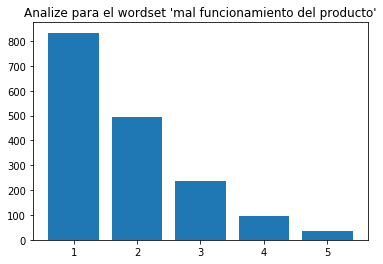

00h 00m 00s ____ FIN FUNCIÓN ANALIZE_WORDSET_NOT_SO_NAIVE __________________________________________


In [21]:
wsw2 =   {
            'name':'mal funcionamiento del producto'
            ,'wordset': 
            {
                'ands': [],
                'ors' :
                    [
                    # GENÉRICO, NO FUNCIONA DEBIDAMENTE
                    {
                    'syn0': ['not_work'],
                    'syn1': ['working_properly', 'work_properly'],
                    'syn2': ['not'],
                    'nots': []
                    }
                    ,{
                    'syn0': ['faulty', 'defective', 'fluke'],
                    'syn1': [],
                    'syn2': [],
                    'nots': []
                    }
                    # PROBLEMAS DE ESTABILIDAD
                    ,{
                    'syn0': ['unstable', 'stability_issues'],
                    'syn1': ['stable'],
                    'syn2': ['not'],
                    'nots': []
                    },
                    {
                    'syn0': [],
                    'syn1': ['suddenly_stopped', 'stopped'],
                    'syn2': ['suddenly', 'working'],
                    'nots': []
                    },
                    {
                    'syn0': ['unreliable', 'works_intermittently'],
                    'syn1': ['reliable'],
                    'syn2': ['not'],
                    'nots': []
                    }
                    # DEJÓ DE FUNCIONAR O COMENZÓ A FUNCIONAR MAL
                    ,{
                    'syn0': [],
                    'syn1': ['quit_working', 'stopped_working', 'stopped_working', 'stop_working', 'quits_working', 'quitted_working'],
                    'syn2': [],
                    'nots': []
                    }
                    ,{
                    'syn0': [],
                    'syn1': ['within_week', 'within_weeks', 'week', 'weeks'],
                    'syn2': ['stopped_working', 'started', 'broke', 'quits_working', 'quitted_working'],
                    'nots': []
                    }
                    ,{
                    'syn0': ['obsolescence', 'short_life', 'never_worked'],
                    'syn1': [],
                    'syn2': [],
                    'nots': []
                    }
                    # ALTO CONSUMO
                    ,{
                    'syn0': ['drains_battery', 'eat_batteries', 'eats_batteries', 'eating_batteries'],
                    'syn1': [],
                    'syn2': [],
                    'nots': []
                    }
                    ,{
                    'syn0': [],
                    'syn1': ['power_consumption'],
                    'syn2': ['high'],
                    'nots': []
                    },
                    ]
            }
        }
an2_fil, an2_agg = utils.analize_wordset_not_so_naive_4(odf, wsw2, True)

00h 00m 00s ____ INICIO FUNCIÓN BUSCA_TOKENS _______________________________________________________
00h 00m 00s ____ FIN FUNCIÓN GENERATE_BOW __________________________________________________________
00h 00m 00s ____ INICIO FUNCIÓN BUSCA_TOKENS _______________________________________________________
00h 00m 00s ____ FIN FUNCIÓN GENERATE_BOW __________________________________________________________
00h 00m 00s ____ INICIO FUNCIÓN BUSCA_TOKENS _______________________________________________________
00h 00m 00s ____ FIN FUNCIÓN GENERATE_BOW __________________________________________________________
00h 00m 00s ____ INICIO FUNCIÓN BUSCA_TOKENS _______________________________________________________
00h 00m 00s ____ FIN FUNCIÓN GENERATE_BOW __________________________________________________________
00h 00m 00s ____ INICIO FUNCIÓN ANALIZE_WORDSET_NOT_SO_NAIVE _______________________________________
00h 00m 00s :::: WORDSET A ANALIZAR: característica del producto ::::::::::::::::::::::::::

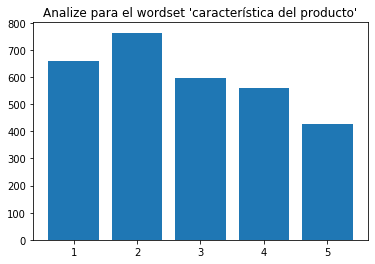

00h 00m 00s ____ FIN FUNCIÓN ANALIZE_WORDSET_NOT_SO_NAIVE __________________________________________


In [22]:
wsw3 =   {
            'name':'característica del producto'
            ,'wordset': 
            {
                'ands': [],
                'ors' :
                    [
                    # GENÉRICO APARIENCIA
                    {
                    'syn0': utils.busca_tokens(tokens, ['looks']),
                    'syn1': [],
                    'syn2': [],
                    'nots': []
                    }
                    # MALA CALIDAD DE PIEZAS MECÁNICAS Y COMPONENTES
                    ,{
                    'syn0': utils.busca_tokens(tokens, ['defective']),
                    'syn1': [],
                    'syn2': [],
                    'nots': []
                    }
                    ,{
                    'syn0': ['broke_apart', 'fell_apart', 'fall_apart', 'falling_apart',  'cheaply_made', 'cheap_plastic', 'poor_quality', 'bit_flimsy', 'defective_product', 'poorly_constructed'],
                    'syn1': ['melted'],
                    'syn2': [],
                    'nots': []
                    }
                    ,{
                    'syn0': ['feels_cheap', 'felt_cheap', 'cheap_feel', 'poorly_made', 'cheap_plastic', 'cheap_plastics', 'cheap_cardboard', 'cheap_feeling', 'cheap_construction', 'cheap_materials', 'cheap_material'],
                    'syn1': [],
                    'syn2': [],
                    'nots': []
                    }
                    ,{
                    'syn0': [],
                    'syn1': ['build_quality'],
                    'syn2': ['bad'],
                    'nots': ['not']
                    }
                    ,{
                    'syn0': ['broke_within', 'easily_broken', 'breaks_easily', 'breaks_easy', 'breaks_every', 'breaks_quickly', 'broke_quickly', 'broke_shortly'],
                    'syn1': [],
                    'syn2': [],
                    'nots': []
                    }
                    ,{
                    'syn0': [],
                    'syn1': ['sound_quality', 'audio_quality'],
                    'syn2': ['poor', 'bad'],
                    'nots': []
                    }
                    ,{
                    'syn0': [],
                    'syn1': ['picture_quality', 'image_quality'],
                    'syn2': ['poor', 'bad'],
                    'nots': []
                    }
                    ,{
                    'syn0': [],
                    'syn1': ['battery_life'],
                    'syn2': ['short'],
                    'nots': []
                    }
                    # DISEÑO PRESENTA FALLOS
                    ,{
                    'syn0': ['design_flaw', 'design_defect', 'design_weakness', 'flawed_design', 'poor_design'],
                    'syn1': ['serious_design'],
                    'syn2': ['flaw', 'flaws'],
                    'nots': []
                    }
                    ,{
                    'syn0': utils.busca_tokens(tokens, ['drawbacks']),
                    'syn1': [],
                    'syn2': [],
                    'nots': []
                    }
                    ,{
                    'syn0': utils.busca_tokens(tokens, ['drawback']),
                    'syn1': [],
                    'syn2': [],
                    'nots': []
                    }
                    # TAMAÑO INADECUADO
                    ,{
                    'syn0': [],
                    'syn1': ['fit', 'fits'],
                    'syn2': ['not', 'no'],
                    'nots': []
                    },
                    {
                    'syn0': [],
                    'syn1': ['big', 'small', 'long', 'short'],
                    'syn2': ['too', 'not_enough', 'way_too'],
                    'nots': []
                    },
                    {
                    'syn0': [],
                    'syn1': ['size', 'length'],
                    'syn2': ['wrong'],
                    'nots': ['no']
                    },
                    {
                    'syn0': ['too_short', 'too_long', 'not_fit', 'too_small', 'too_big', 'too_large'],
                    'syn1': ['long_enough'],
                    'syn2': ['not'],
                    'nots': []
                    }
                    # BUENA CALIDAD DE PIEZAS MECÁNICAS Y COMPONENTES
                    ,{
                    'syn0': ['excellent_build', 'sturdy'],
                    'syn1': [],
                    'syn2': [],
                    'nots': []
                    }
                    ,{
                    'syn0': ['well_made', 'quite_good', 'well_designed', 'excellent_product', 'high_quality'],
                    'syn1': ['build_quality', 'image_quality'],
                    'syn2': ['good', 'nice', 'high'],
                    'nots': []
                    },
                    {
                    'syn0': ['excellent_product', 'excellent_quality', 'excellent_results', 'excellent_sound'],
                    'syn1': [],
                    'syn2': [],
                    'nots': []
                    }
                    ,{
                    'syn0': ['sounds_great'],
                    'syn1': ['sound_quality', 'audio_quality'],
                    'syn2': ['good', 'great', 'excellent'],
                    'nots': ['not']
                    }
                    ,{
                    'syn0': [],
                    'syn1': ['picture_quality', 'image_quality'],
                    'syn2': ['good', 'great', 'excellent'],
                    'nots': ['not']
                    }
                    ,{
                    'syn0': [],
                    'syn1': ['battery_life'],
                    'syn2': ['good', 'great', 'long', 'excellent'],
                    'nots': ['not']
                    }
                    # BUEN ASPECTO
                    ,{
                    'syn0': ['nice_looking'],
                    'syn1': [],
                    'syn2': [],
                    'nots': []
                    }
                    # TAMAÑO ADECUADO
                    ,{
                    'syn0': ['fit_perfectly'],
                    'syn1': ['fit', 'fits'],
                    'syn2': ['good', 'perfectly', 'right'],
                    'nots': ['expected', 'not']
                    }
                    ,{
                    'syn0': ['perfect_size'],
                    'syn1': ['size', 'length'],
                    'syn2': ['perfect'],
                    'nots': []
                    }
                    ]
            }
        }               
an3_fil, an3_agg = utils.analize_wordset_not_so_naive_4(odf, wsw3, True)

00h 00m 00s ____ INICIO FUNCIÓN BUSCA_TOKENS _______________________________________________________
00h 00m 00s ____ FIN FUNCIÓN GENERATE_BOW __________________________________________________________
00h 00m 00s ____ INICIO FUNCIÓN BUSCA_TOKENS _______________________________________________________
00h 00m 00s ____ FIN FUNCIÓN GENERATE_BOW __________________________________________________________
00h 00m 00s ____ INICIO FUNCIÓN BUSCA_TOKENS _______________________________________________________
00h 00m 00s ____ FIN FUNCIÓN GENERATE_BOW __________________________________________________________
00h 00m 00s ____ INICIO FUNCIÓN BUSCA_TOKENS _______________________________________________________
00h 00m 00s ____ FIN FUNCIÓN GENERATE_BOW __________________________________________________________
00h 00m 00s ____ INICIO FUNCIÓN BUSCA_TOKENS _______________________________________________________
00h 00m 00s ____ FIN FUNCIÓN GENERATE_BOW _________________________________________________

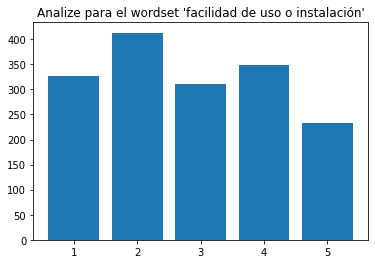

00h 00m 00s ____ FIN FUNCIÓN ANALIZE_WORDSET_NOT_SO_NAIVE __________________________________________


In [23]:
wsw4 =  {
            'name':'facilidad de uso o instalación'
            ,'wordset': 
            {
                'ands': [],
                'ors' :
                    [
                    # PUESTA EN FUNCIONAMIENTO SENCILLA O RÁPIDA
                    
                    #{
                    #'syn0': ['easy_install', 'easy_installation', 'easy_setup', 'installed_easily', 'quick_installation', 'plug_play'],
                    #'syn1': ['plug'],
                    #'syn2': ['play'],
                    #'nots': []
                    ##'nots': ['not', 'no']
                    #}
                    #,{
                    #'syn0': [],
                    #'syn1': ['installation', 'install', 'setup', 'installed'],
                    #'syn2': ['easy', 'fast', 'quick', 'easily', 'smooth', 'breeze'],
                    #'nots': []
                    ##'nots': ['not', 'no']
                    #}
                    #,{
                    #'syn0': [],
                    #'syn1': ['installed'],
                    #'syn2': ['easily', 'quickly'],
                    #'nots': []
                    ##'nots': ['not', 'no']
                    #}
                    {
                    'syn0': utils.busca_tokens(tokens, ['install', 'installation', 'installed', 'setup']),
                    'syn1': [],
                    'syn2': [],
                    'nots': []
                    }
                    ,{
                    'syn0': ['plug_play'],
                    'syn1': ['plug'],
                    'syn2': ['play'],
                    'nots': []
                    }
                    # USO DEL MANUAL DE INSTRUCCIONES
                    ,{
                    #'syn0': ['followed_instructions', 'written_instructions', 'written_documentation', 'instruction_book', 'instruction_booklet', 'instruction_manual', 'instruction_manuals', 'instruction_sheet', 'instructions_included', 'instructions_say'],
                    'syn0': utils.busca_tokens(tokens, ['instructions']),
                    'syn1': [],
                    'syn2': [],
                    'nots': []
                    }
                    ,{
                    'syn0': utils.busca_tokens(tokens, ['instruction']),
                    #'syn1': ['instructions'],
                    #'syn2': ['understand', 'unintelligible'],
                    'syn1': [],
                    'syn2': [],
                    'nots': []
                    }
                    # PRODUCTO DE DIFÍCIL USO, INCÓMODOS O CON ELEMENTOS DESAGRADABLES
                    ,{
                    'syn0': [],
                    'syn1': ['user_friendly'],
                    'syn2': ['not'],
                    'nots': []
                    }
                    ,{
                    'syn0': ['not_recognize'],
                    'syn1': [],
                    'syn2': [],
                    'nots': []
                    }
                    ,{
                    'syn0': ['tricky', 'figure_out', 'figured_out', 'figuring_out'],
                    'syn1': ['trying'],
                    'syn2': ['work'],
                    'nots': []
                    }
                    ,{
                    'syn0': utils.busca_tokens(tokens, ['annoying']),
                    'syn1': [],
                    'syn2': [],
                    'nots': []
                    }
                    ,{
                    'syn0': utils.busca_tokens(tokens, ['uncomfortable']),
                    'syn1': [],
                    'syn2': [],
                    'nots': []
                    }
                    ]
            }
        }
an4_fil, an4_agg = utils.analize_wordset_not_so_naive_4(odf, wsw4, True)

00h 00m 00s ____ INICIO FUNCIÓN BUSCA_TOKENS _______________________________________________________
00h 00m 00s ____ FIN FUNCIÓN GENERATE_BOW __________________________________________________________
00h 00m 00s ____ INICIO FUNCIÓN ANALIZE_WORDSET_NOT_SO_NAIVE _______________________________________
00h 00m 00s :::: WORDSET A ANALIZAR: expectativas vs realidad ::::::::::::::::::::::::::::::::::::::
00h 00m 00s :::: ARRANCA EL BUCLE DE OPINIONES :::::::::::::::::::::::::::::::::::::::::::::::::::::
00h 00m 00s :::: BUCLE OPINIONES: NUM_DOCUMENTO=0 DE 17525 :::::::::::::::::::::::::::::::::::::::::
00h 00m 02s :::: FINALIZA EL BUCLE DE OPINIONES ::::::::::::::::::::::::::::::::::::::::::::::::::::


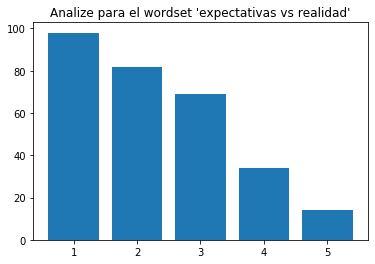

00h 00m 00s ____ FIN FUNCIÓN ANALIZE_WORDSET_NOT_SO_NAIVE __________________________________________


In [24]:
wsw5 =  {
            'name':'expectativas vs realidad'
            ,'wordset': 
            {
                'ands': [],
                'ors' :
                    [
                    # GENÉRICO. SE MENCIONA LA DESCRIPCION
                    {
                    'syn0': utils.busca_tokens(tokens, ['description']),
                    'syn1': [],
                    'syn2': [],
                    'nots': []
                    }
                    # SE ENVÍA UN PRODUCTO EQUIVOCADO
                    ,{
                    'syn0': ['specifically_ordered', 'shipped_wrong'],
                    'syn1': [],
                    'syn2': [],
                    'nots': []
                    }
                    # EL PRODUCTO NO ES EXACTAMENTE COMO SE DESCRIBE
                    ,{
                    'syn0': [],
                    'syn1': ['advertised'],
                    'syn2': ['exactly'],
                    'nots': ['not']
                    }
                    ,{
                    'syn0': [],
                    'syn1': ['different_than'],
                    'syn2': ['advertised'],
                    'nots': []
                    }
                    #,{
                    #'syn0': [],
                    #'syn1': ['description'],
                    #'syn2': ['incorrect'],
                    #'nots': []
                    #}
                    #,{
                    #'syn0': ['description_said'],
                    #'syn1': ['description'],
                    #'syn2': ['say', 'says'],
                    #'nots': []
                    #}
                    #,{
                    #'syn0': [],
                    #'syn1': ['description'],
                    #'syn2': ['misleading', 'misled'],
                    #'nots': []
                    #}
                    ,{
                    'syn0': [],
                    'syn1': ['totally_different', 'entirely_different'],
                    'syn2': ['recieved', 'described', 'pictured', 'ordered'],
                    'nots': []
                    }
                    ,{
                    'syn0': [],
                    'syn1': ['pictured', 'advertised', 'described'],
                    'syn2': ['not'],
                    'nots': []
                    }
                    #,{
                    #'syn0': ['description_states'],
                    #'syn1': ['picture'],
                    #'syn2': ['shows'],
                    #'nots': []
                    #}
                    ,{
                    'syn0': ['meet_expectation', 'meet_expectations', 'meeting_expectations', 'meets_expectations'],
                    'syn1': [],
                    'syn2': [],
                    'nots': ['not']
                    }
                    ]
            }
        }
an5_fil, an5_agg = utils.analize_wordset_not_so_naive_4(odf, wsw5, True)

00h 00m 00s ____ INICIO FUNCIÓN BUSCA_TOKENS _______________________________________________________
00h 00m 00s ____ FIN FUNCIÓN GENERATE_BOW __________________________________________________________
00h 00m 00s ____ INICIO FUNCIÓN BUSCA_TOKENS _______________________________________________________
00h 00m 00s ____ FIN FUNCIÓN GENERATE_BOW __________________________________________________________
00h 00m 00s ____ INICIO FUNCIÓN BUSCA_TOKENS _______________________________________________________
00h 00m 00s ____ FIN FUNCIÓN GENERATE_BOW __________________________________________________________
00h 00m 00s ____ INICIO FUNCIÓN BUSCA_TOKENS _______________________________________________________
00h 00m 00s ____ FIN FUNCIÓN GENERATE_BOW __________________________________________________________
00h 00m 00s ____ INICIO FUNCIÓN ANALIZE_WORDSET_NOT_SO_NAIVE _______________________________________
00h 00m 00s :::: WORDSET A ANALIZAR: referencia a opiniones :::::::::::::::::::::::::::::::

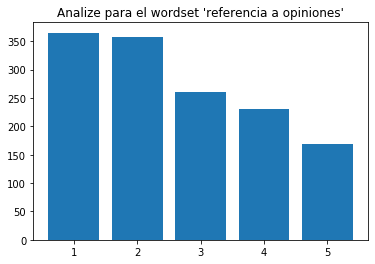

00h 00m 00s ____ FIN FUNCIÓN ANALIZE_WORDSET_NOT_SO_NAIVE __________________________________________


In [25]:
wsw6 =  {
            'name':'referencia a opiniones'
            ,'wordset': 
            {
                'ands': [],
                'ors' :
                    [
                    {
                    'syn0': utils.busca_tokens(tokens, ['review']),
                    'syn1': [],
                    'syn2': [],
                    'nots': []
                    }
                    ,{
                    'syn0': utils.busca_tokens(tokens, ['reviews']),
                    'syn1': [],
                    'syn2': [],
                    'nots': []
                    }
                    ,{
                    'syn0': utils.busca_tokens(tokens, ['reviewer']),
                    'syn1': [],
                    'syn2': [],
                    'nots': []
                    }
                    ,{
                    'syn0': utils.busca_tokens(tokens, ['reviewers']),
                    'syn1': [],
                    'syn2': [],
                    'nots': []
                    }
                    ]
            }
        }   
an6_fil, an6_agg = utils.analize_wordset_not_so_naive_4(odf, wsw6, True)

00h 00m 00s ____ INICIO FUNCIÓN BUSCA_TOKENS _______________________________________________________
00h 00m 00s ____ FIN FUNCIÓN GENERATE_BOW __________________________________________________________
00h 00m 00s ____ INICIO FUNCIÓN BUSCA_TOKENS _______________________________________________________
00h 00m 00s ____ FIN FUNCIÓN GENERATE_BOW __________________________________________________________
00h 00m 00s ____ INICIO FUNCIÓN BUSCA_TOKENS _______________________________________________________
00h 00m 00s ____ FIN FUNCIÓN GENERATE_BOW __________________________________________________________
00h 00m 00s ____ INICIO FUNCIÓN ANALIZE_WORDSET_NOT_SO_NAIVE _______________________________________
00h 00m 00s :::: WORDSET A ANALIZAR: experiencia de envío/entrega/packaging ::::::::::::::::::::::::
00h 00m 00s :::: ARRANCA EL BUCLE DE OPINIONES :::::::::::::::::::::::::::::::::::::::::::::::::::::
00h 00m 00s :::: BUCLE OPINIONES: NUM_DOCUMENTO=0 DE 17525 ::::::::::::::::::::::::::::::::

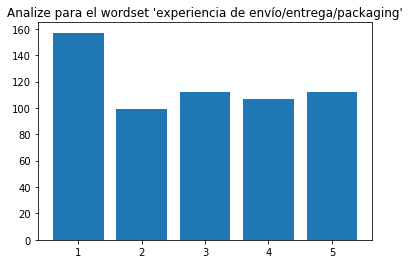

00h 00m 00s ____ FIN FUNCIÓN ANALIZE_WORDSET_NOT_SO_NAIVE __________________________________________


In [26]:
wsw7 =  {
            'name':'experiencia de envío/entrega/packaging'
            ,'wordset': 
            {
                'ands': [],
                'ors' :
                    [
                    # GENÉRICO DE ENVÍO
                    {
                    'syn0': [],
                    'syn1': ['shipment_arrived'],
                    #'syn2': ['excellent_condition'],
                    'syn2': [],
                    'nots': []
                    }
                    # PAQUETE RECIBIDO EN MALAS CONDICIONES
                    ,{
                    'syn0': ['shipping_damage'],
                    'syn1': ['broken', 'damaged'],
                    'syn2': ['box', 'package'],
                    'nots': []
                    }
                    #,{
                    #'syn0': ['poor_packaging'],
                    #'syn1': ['package', 'package_arrived'],
                    #'syn2': ['unharmed'],
                    #'nots': []
                    #},
                    ,{
                    'syn0': [],
                    'syn1': ['package', 'box'],
                    'syn2': ['missing'],
                    'nots': []
                    }
                    # GENÉRICO DE PAQUETE Y PACKAGING
                    ,{
                    'syn0': utils.busca_tokens(tokens, ['packaging']),
                    'syn1': [],
                    'syn2': [],
                    'nots': []
                    }
                    ,{
                    'syn0': utils.busca_tokens(tokens, ['packed']),
                    'syn1': [],
                    'syn2': [],
                    'nots': []
                    }
                    ,
                    {
                    'syn0': [],
                    'syn1': utils.busca_tokens(tokens, ['package']),
                    #'syn2': ['seal', 'unsealed', 'factory_sealed'],
                    'syn2': [],
                    'nots': []
                    }
                    # ENVÍO RÁPIDO
                    ,{
                    'syn0': ['timely_shipping', 'speedy_shipping', 'overnight_shipping', 'ships_quickly', 'shipped_fast', 'shipped_quickly', 'shipped_promptly'],
                    'syn1': ['shipping', 'delivery'],
                    'syn2': ['fast', 'quick', 'good'],
                    'nots': []
                    }
                    ,{
                    'syn0': ['shipped_immediately', 'fast_delivery', 'fast_service', 'fast_ship', 'fast_shipping', 'quick_delivery'],
                    'syn1': [],
                    'syn2': [],
                    'nots': []
                    }
                    ,{
                    'syn0': ['arrived_timely', 'arrived_earlier', 'arrived_sooner', 'arrived_promptly'],
                    'syn1': ['arrived'],
                    'syn2': ['fast', 'quickly'],
                    'nots': []
                    }
                    ,{
                    'syn0': [],
                    'syn1': ['shipment_arrived'],
                    'syn2': ['short_time'],
                    'nots': []
                    }
                    # ENVÍO LENTO
                    ,{
                    'syn0': [],
                    'syn1': ['shipping', 'delivery'],
                    'syn2': ['slow'],
                    'nots': []
                    }
                    ]
            }
        }
an7_fil, an7_agg = utils.analize_wordset_not_so_naive_4(odf, wsw7, True)

00h 00m 00s ____ INICIO FUNCIÓN BUSCA_TOKENS _______________________________________________________
00h 00m 00s ____ FIN FUNCIÓN GENERATE_BOW __________________________________________________________
00h 00m 00s ____ INICIO FUNCIÓN BUSCA_TOKENS _______________________________________________________
00h 00m 00s ____ FIN FUNCIÓN GENERATE_BOW __________________________________________________________
00h 00m 00s ____ INICIO FUNCIÓN BUSCA_TOKENS _______________________________________________________
00h 00m 00s ____ FIN FUNCIÓN GENERATE_BOW __________________________________________________________
00h 00m 00s ____ INICIO FUNCIÓN ANALIZE_WORDSET_NOT_SO_NAIVE _______________________________________
00h 00m 00s :::: WORDSET A ANALIZAR: experiencia en devolución/postventa :::::::::::::::::::::::::::
00h 00m 00s :::: ARRANCA EL BUCLE DE OPINIONES :::::::::::::::::::::::::::::::::::::::::::::::::::::
00h 00m 00s :::: BUCLE OPINIONES: NUM_DOCUMENTO=0 DE 17525 ::::::::::::::::::::::::::::::::

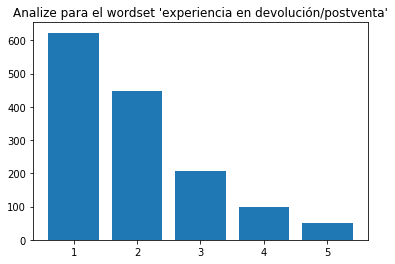

00h 00m 00s ____ FIN FUNCIÓN ANALIZE_WORDSET_NOT_SO_NAIVE __________________________________________


In [27]:
wsw8 =  {
            'name':'experiencia en devolución/postventa'
            ,'wordset': 
            {
                'ands': [],
                'ors' :
                    [
                    {
                    'syn0': ['help_desk', 'customer_support', 'customer_service', 'tech_support', 'call_customer', 'called_customer'],
                    'syn1': [],
                    'syn2': [],
                    'nots': []
                    }
                    ,{
                    'syn0': utils.busca_tokens(tokens, ['warranty']),
                    'syn1': [],
                    'syn2': [],
                    'nots': []
                    }
                    ,{
                    'syn0': utils.busca_tokens(tokens, ['return']),
                    'syn1': [],
                    'syn2': [],
                    'nots': []
                    }
                    ,{
                    'syn0': utils.busca_tokens(tokens, ['returning']),
                    'syn1': [],
                    'syn2': [],
                    'nots': []
                    }
                    ,{
                    'syn0': ['sent_back', 'send_back', 'sending_back', 'ship_back'],
                    'syn1': [],
                    'syn2': [],
                    'nots': []
                    }
                    ]
            }
        }
an8_fil, an8_agg = utils.analize_wordset_not_so_naive_4(odf, wsw8, True)

00h 00m 00s ____ INICIO FUNCIÓN BUSCA_TOKENS _______________________________________________________
00h 00m 00s ____ FIN FUNCIÓN GENERATE_BOW __________________________________________________________
00h 00m 00s ____ INICIO FUNCIÓN BUSCA_TOKENS _______________________________________________________
00h 00m 00s ____ FIN FUNCIÓN GENERATE_BOW __________________________________________________________
00h 00m 00s ____ INICIO FUNCIÓN BUSCA_TOKENS _______________________________________________________
00h 00m 00s ____ FIN FUNCIÓN GENERATE_BOW __________________________________________________________
00h 00m 00s ____ INICIO FUNCIÓN BUSCA_TOKENS _______________________________________________________
00h 00m 00s ____ FIN FUNCIÓN GENERATE_BOW __________________________________________________________
00h 00m 00s ____ INICIO FUNCIÓN BUSCA_TOKENS _______________________________________________________
00h 00m 00s ____ FIN FUNCIÓN GENERATE_BOW _________________________________________________

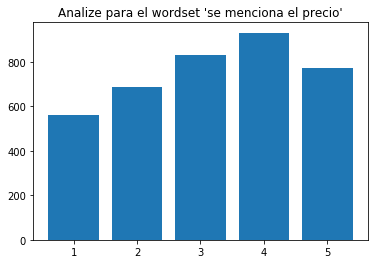

00h 00m 00s ____ FIN FUNCIÓN ANALIZE_WORDSET_NOT_SO_NAIVE __________________________________________


In [28]:
wsw9 =  {
            'name':'se menciona el precio'
            ,'wordset': 
            {
                'ands': [],
                'ors' :
                    [
                    #{
                    #'syn0': busca_tokens(tokens, ['money']),
                    #'syn1': [],
                    #'syn2': [],
                    #'nots': []
                    #}
                    #,
                    {
                    'syn0': utils.busca_tokens(tokens, ['price']),
                    'syn1': [],
                    'syn2': [],
                    'nots': []
                    }
                    ,{
                    'syn0': utils.busca_tokens(tokens, ['priced']),
                    'syn1': [],
                    'syn2': [],
                    'nots': []
                    }
                    ,{
                    'syn0': utils.busca_tokens(tokens, ['dollar']),
                    'syn1': [],
                    'syn2': [],
                    'nots': []
                    }
                    ,{
                    'syn0': utils.busca_tokens(tokens, ['dollars']),
                    'syn1': [],
                    'syn2': [],
                    'nots': []
                    }
                    ,{
                    'syn0': utils.busca_tokens(tokens, ['expensive']),
                    'syn1': [],
                    'syn2': [],
                    'nots': []
                    }
                    ,{
                    'syn0': ['cheap', 'ridiculously_cheap', 'incredibly_cheap', 'super_cheap', 'kinda_cheap', 'relatively_cheap'],
                    'syn1': [],
                    'syn2': [],
                    'nots': []
                    }
                    ]
            }
        }
an9_fil, an9_agg = utils.analize_wordset_not_so_naive_4(odf, wsw9, True)

00h 00m 00s ____ INICIO FUNCIÓN ANALIZE_WORDSET_NOT_SO_NAIVE _______________________________________
00h 00m 00s :::: WORDSET A ANALIZAR: sentimiento negativo ::::::::::::::::::::::::::::::::::::::::::
00h 00m 00s :::: ARRANCA EL BUCLE DE OPINIONES :::::::::::::::::::::::::::::::::::::::::::::::::::::
00h 00m 00s :::: BUCLE OPINIONES: NUM_DOCUMENTO=0 DE 17525 :::::::::::::::::::::::::::::::::::::::::
00h 00m 02s :::: FINALIZA EL BUCLE DE OPINIONES ::::::::::::::::::::::::::::::::::::::::::::::::::::


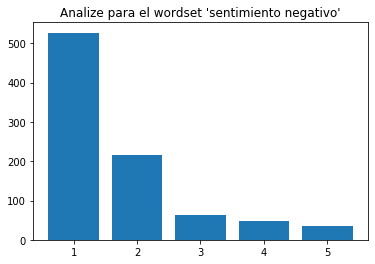

00h 00m 00s ____ FIN FUNCIÓN ANALIZE_WORDSET_NOT_SO_NAIVE __________________________________________


In [29]:
wsw10 = {
            'name':'sentimiento negativo'
            ,'wordset': 
            {
                'ands': [],
                'ors' :
                    [
                    {
                    'syn0': ['not_buy', 'not_bother', 'buyer_beware', 'never_buy', 'not_waste', 'not_wast', 'throw_away', 'cannot_recommend', 'wasted_money'],
                    'syn1': [],
                    'syn2': [],
                    'nots': []
                    }
                    ]
            }
        }
an10_fil, an10_agg = utils.analize_wordset_not_so_naive_4(odf, wsw10, show=True)

00h 00m 00s ____ INICIO FUNCIÓN BUSCA_TOKENS _______________________________________________________
00h 00m 00s ____ FIN FUNCIÓN GENERATE_BOW __________________________________________________________
00h 00m 00s ____ INICIO FUNCIÓN ANALIZE_WORDSET_NOT_SO_NAIVE _______________________________________
00h 00m 00s :::: WORDSET A ANALIZAR: sentimiento positivo ::::::::::::::::::::::::::::::::::::::::::
00h 00m 00s :::: ARRANCA EL BUCLE DE OPINIONES :::::::::::::::::::::::::::::::::::::::::::::::::::::
00h 00m 00s :::: BUCLE OPINIONES: NUM_DOCUMENTO=0 DE 17525 :::::::::::::::::::::::::::::::::::::::::
00h 00m 02s :::: FINALIZA EL BUCLE DE OPINIONES ::::::::::::::::::::::::::::::::::::::::::::::::::::


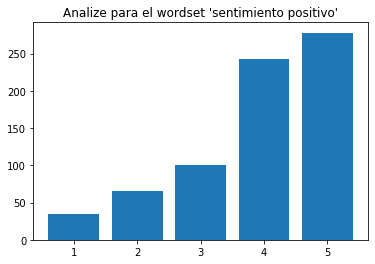

00h 00m 00s ____ FIN FUNCIÓN ANALIZE_WORDSET_NOT_SO_NAIVE __________________________________________


In [30]:
wsw11 = {
            'name':'sentimiento positivo'
            ,'wordset': 
            {
                'ands': [],
                'ors' :
                    [
                    {
                    'syn0': ['highly_recommend', 'definitely_recommend', 'no_complaints'],
                    'syn1': [],
                    'syn2': [],
                    'nots': []
                    }
                    ,{
                    'syn0': ['great_value', 'good_value', 'good_deal', 'well_worth', 'totally_worth', 'definately_worth'],
                    'syn1': [],
                    'syn2': [],
                    'nots': []
                    }
                    ,{
                    'syn0': ['wise_choice', 'good_choice', 'smart_choice', 'excellent_choice', 'best_choice'],
                    'syn1': [],
                    'syn2': [],
                    'nots': ['not']
                    }
                    ,{
                    'syn0': ['worth_every'],
                    'syn1': [],
                    'syn2': [],
                    'nots': []
                    }
                    ,{
                    'syn0': ['excellent_product'],
                    'syn1': [],
                    'syn2': [],
                    'nots': []
                    }
                    ,{
                    'syn0': utils.busca_tokens(tokens, ['exceeds']),
                    'syn1': ['pleasantly_surprised'],
                    'syn2': [],
                    'nots': []
                    }
                    ,{
                    'syn0': ['than_expected'],
                    'syn1': [],
                    'syn2': [],
                    'nots': []
                    }
                    ]
            }
        }
an11_fil, an11_agg = utils.analize_wordset_not_so_naive_4(odf, wsw11, show=True)

In [31]:
lista_resultados_busquedas = []
lista_resultados_busquedas.append({'name':wsw1['name'], 'resultados': an1_fil})
lista_resultados_busquedas.append({'name':wsw2['name'], 'resultados': an2_fil})
lista_resultados_busquedas.append({'name':wsw3['name'], 'resultados': an3_fil})
lista_resultados_busquedas.append({'name':wsw4['name'], 'resultados': an4_fil})
lista_resultados_busquedas.append({'name':wsw5['name'], 'resultados': an5_fil})
lista_resultados_busquedas.append({'name':wsw6['name'], 'resultados': an6_fil})
lista_resultados_busquedas.append({'name':wsw7['name'], 'resultados': an7_fil})
lista_resultados_busquedas.append({'name':wsw8['name'], 'resultados': an8_fil})
lista_resultados_busquedas.append({'name':wsw9['name'], 'resultados': an9_fil})
lista_resultados_busquedas.append({'name':wsw10['name'], 'resultados': an10_fil})
lista_resultados_busquedas.append({'name':wsw11['name'], 'resultados': an11_fil})

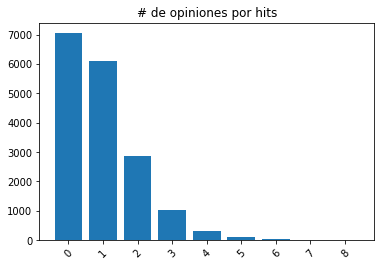

La ocupación parcial es del 60%
La ocupación total es del 18%


In [32]:
mat_doc_ws, mat_doc_ws_agg = utils.analize_wordset_occurrences(odf, lista_resultados_busquedas)

Tras reuniir los resultados de todos los analize vemos el porcentaje de opiniones sobre las que hemos conseguido un hit (es decir, enlazado con al menos un tema). Se muestra un histograma donde se lee cuántas opiniones tratan qué cantidad de temas.

00h 00m 00s ____ INICIO FUNCIÓN VISUALIZE_WORDSETS_NETWORK _________________________________________
00h 00m 00s :::: SE PROCEDE A GENERAR LA EDGELIST ::::::::::::::::::::::::::::::::::::::::::::::::::
00h 00m 00s :::: EDGELIST GENERADA. SE PROCEDE A GENERAR LA NODELIST :::::::::::::::::::::::::::::::
00h 00m 00s :::: SE PROCEDE A POBLAR NODOS Y ARISTAS :::::::::::::::::::::::::::::::::::::::::::::::
00h 00m 00s :::: SE PROCEDE A CALCULAR POS :::::::::::::::::::::::::::::::::::::::::::::::::::::::::
00h 00m 00s :::: SE PROCEDE A DIBUJAR LA RED :::::::::::::::::::::::::::::::::::::::::::::::::::::::


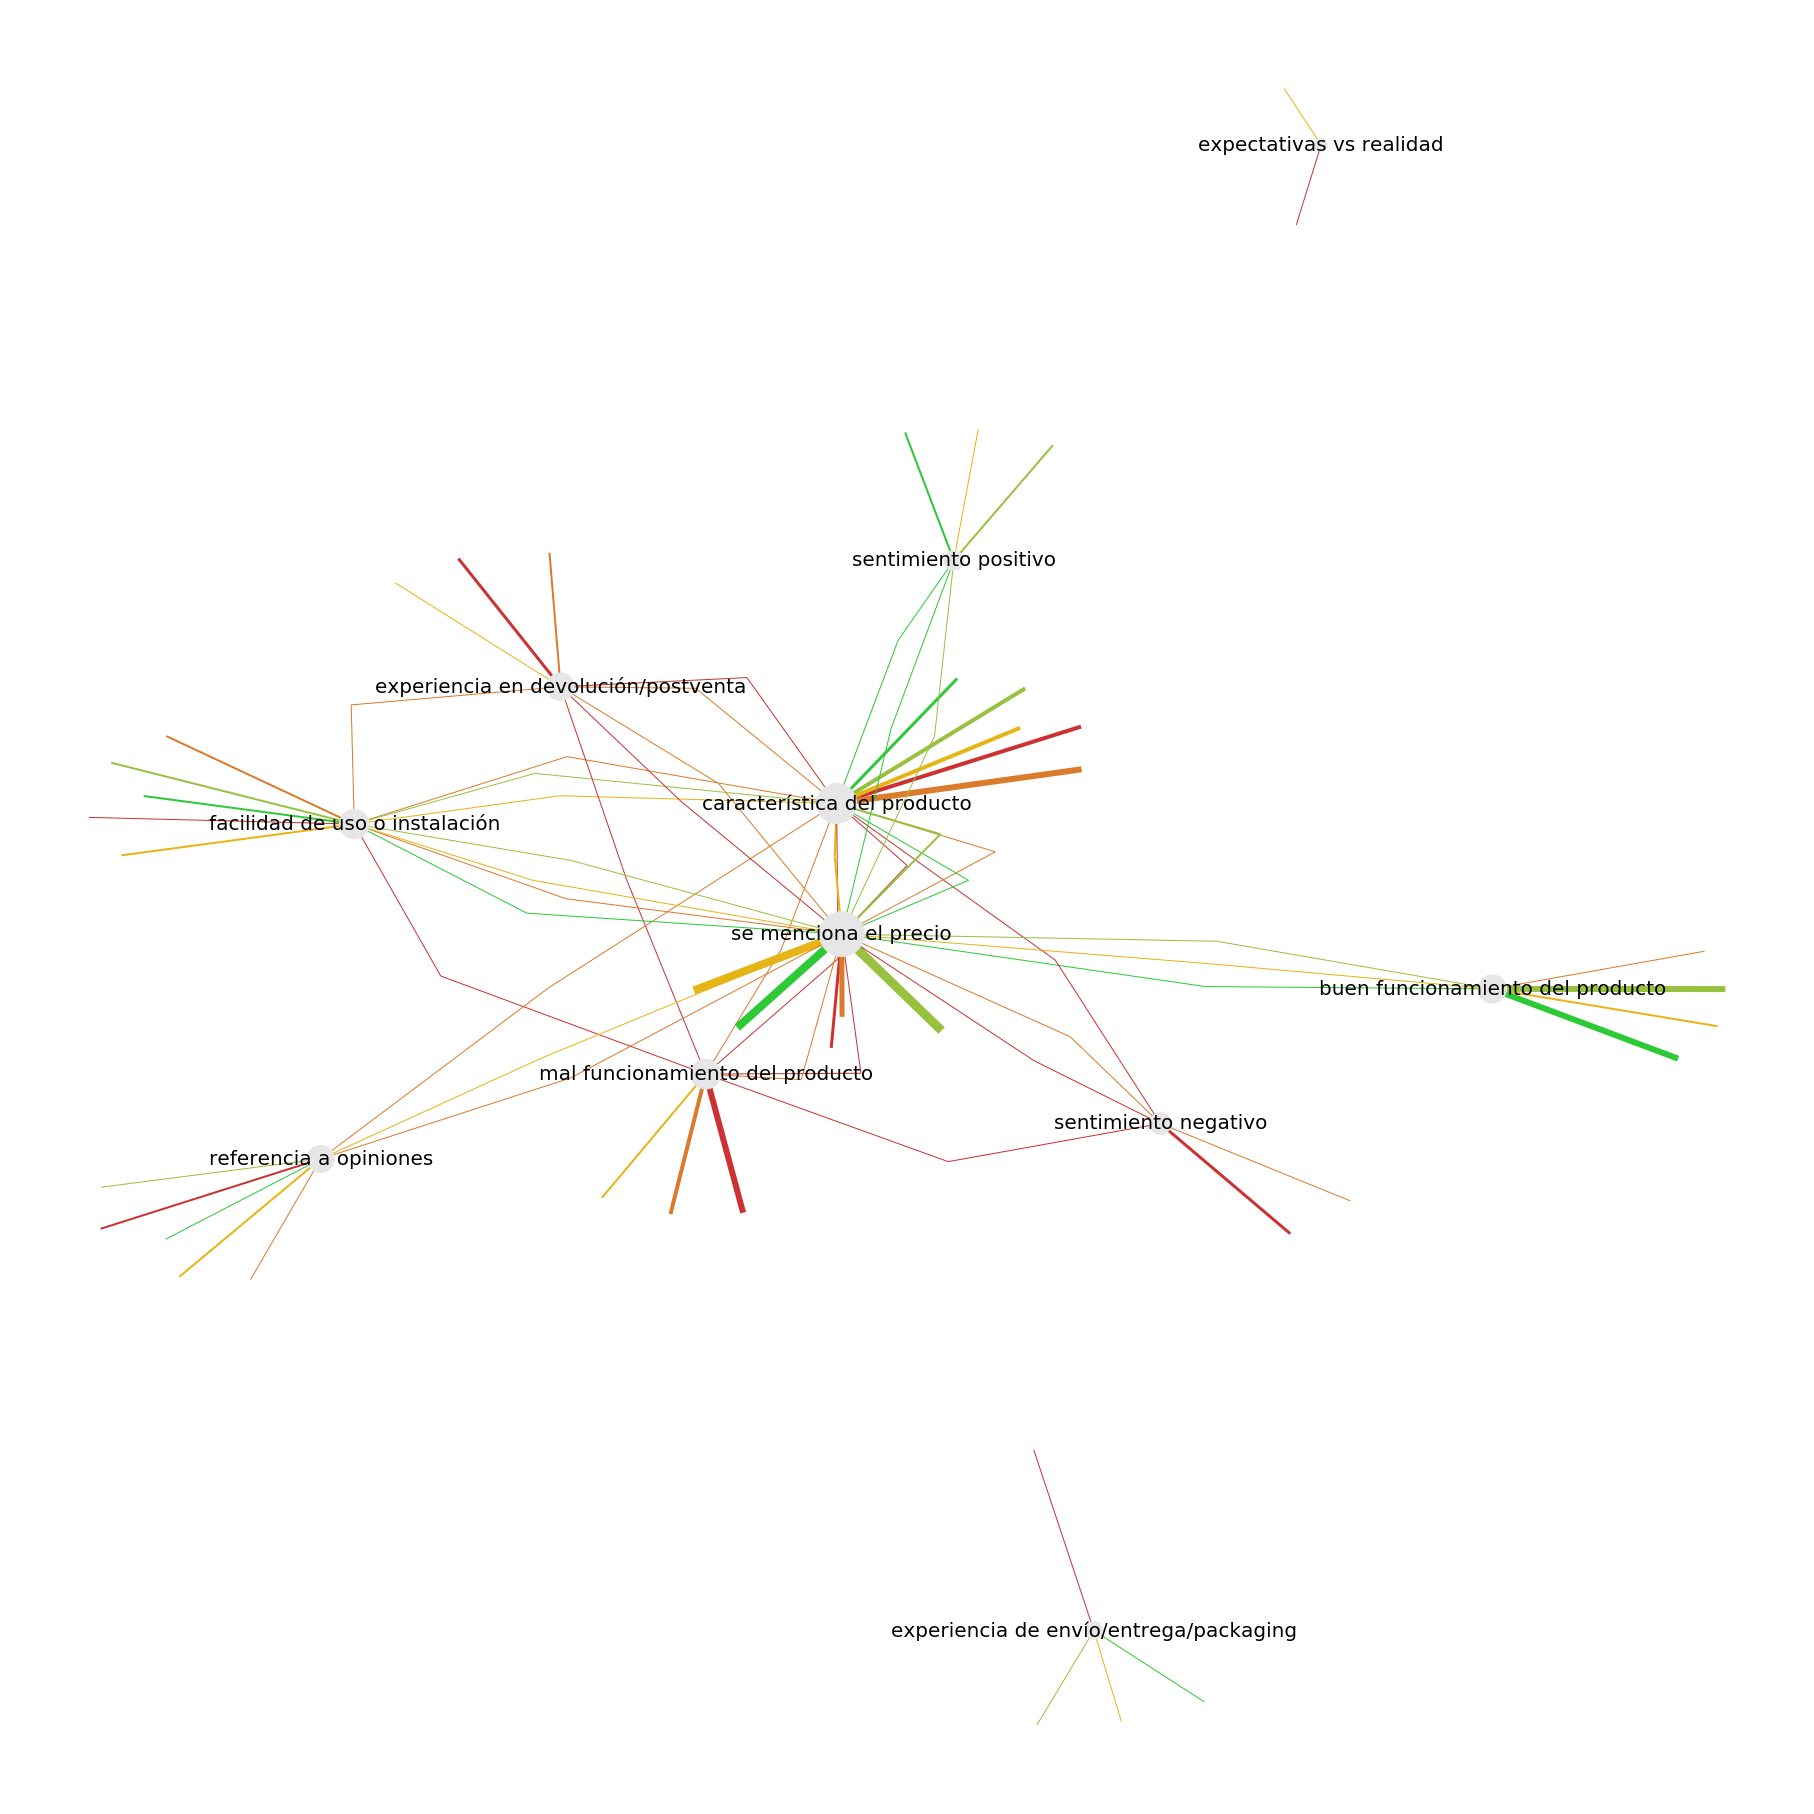

00h 00m 00s ____ FIN DE LA FUNCION VISUALIZE_WORDSETS_NETWORK ______________________________________


In [39]:
utils.visualize_wordsets_network_6(mat_doc_ws, group_size=50, k=0.3, ratings='F')

Esta representación de red muestra, mediante el grosor de las aristas, el volumen de opiniones equivalentes que entran en cada tema. El color representa la puntuación. Para esta visualización se han hecho grupos de opiniones por puntuación y combinación de temas tratados, haciendo, por tanto, grupos de opiniones indistinguibles a efectos de este análisis. Se ha establecido un tamaño de grupo de 50 unidades, por lo que, de no haber 50 opiniones equivalentes, la arista no se dibuja. Eso es lo que ocurre en el caso del tema "experiencia de envío/entrega/packaging" o "expectativas vs realidad": no hay suficientes opiniones equivalentes que traten este tema y un segundo tema.

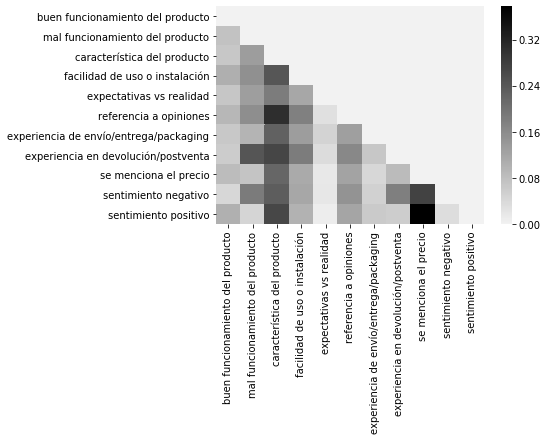

In [40]:
sm = utils.get_sharing_matrix(mat_doc_ws)

El heatmap anterior es la representación de lo que he denominado matriz de compartición. Es una matriz simétrica con unos en la diagonal. Para evitar que la diagonal eleve a 1 el máximo de la escala de color, he eliminado la mitad superior y la diagonal, así se perciben mejor las diferencias de color entre las celdas de valor. Se observa que los dos temas más próximos, en términos de compartir opiniones, son sentimiento positivo y se menciona el precio.

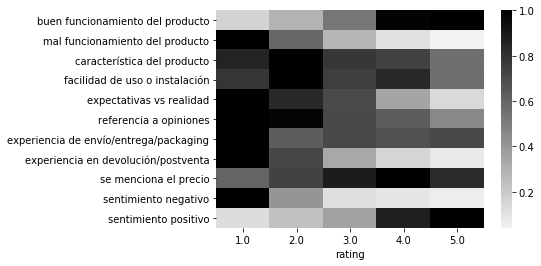

In [35]:
utils.print_topic_heatmaps(mat_doc_ws)

El heatmap anterior se lee en horizontal. Vemos, para cada tema, cómo se distribuyen las opiniones en cuanto a sus puntuaciones. Se observan varios temas en los que es muy habitual encontrarse con opiniones de baja puntuación.

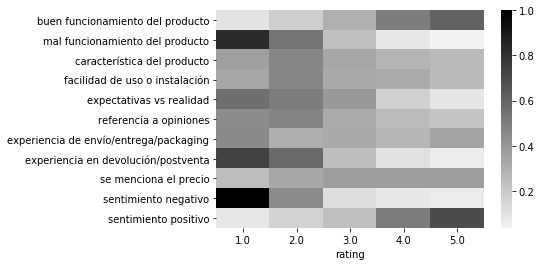

In [36]:
utils.print_rating_heatmaps(mat_doc_ws)

El heatmap anterior se lee en vertical. Vemos la composición de temas para cada puntuación.

In [37]:
utils.get_popular_topic_combinations(mat_doc_ws_agg, utils.get_wordsets_names(mat_doc_ws))

,0,1,2,3,4,5,6,7,8
96,360.0,característica del producto,se menciona el precio,None,None,None,None,None,None
294,164.0,buen funcionamiento del producto,se menciona el precio,None,None,None,None,None,None
57,158.0,facilidad de uso o instalación,se menciona el precio,None,None,None,None,None,None
147,130.0,característica del producto,facilidad de uso o instalación,None,None,None,None,None,None
22,128.0,referencia a opiniones,se menciona el precio,None,None,None,None,None,None
236,122.0,mal funcionamiento del producto,característica del producto,None,None,None,None,None,None
1,118.0,se menciona el precio,sentimiento positivo,None,None,None,None,None,None
115,99.0,característica del producto,referencia a opiniones,None,None,None,None,None,None
182,98.0,mal funcionamiento del producto,experiencia en devolución/postventa,None,None,None,None,None,None
100,97.0,característica del producto,experiencia en devolución/postventa,None,None,None,None,None,None


En la tabla anterior se recoge el top 10 de combinaciones frecuentes.

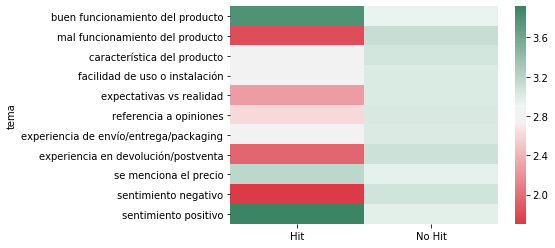

In [38]:
utils.print_statistics_by_topic_heatmap(mat_doc_ws)

En el heatmap anterior comparamos las puntuaciones de aquellas opiniones que sí tratan un tema vs aquellas opiniones que no lo tratan. El color representa la puntuación media de las opiniones. La columna de No Hit, es decir las opiniones que no tratan del tema, la vemos muy pálida. Esto es porque, para cada tema, la mayoría de opiniones no tratan de él, por lo que la columna No Hit tiene un color muy próximo a la puntuación media.